In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
import numpy as np

In [75]:
# BUILD ON 2018 DATA... this is currently calling in 2019 data
city_data = "chicago_food_inspections/inspection_data_2019_v2.csv"

In [76]:
data = pd.read_csv(city_data)
# data.head()

In [77]:
data['logistic_model_prediction'] = np.zeros(len(data.inspection_id))

In [78]:
col = []

for index, row in data.iterrows():
#     print(row.results)
    if (row.results == 'Pass w/ Conditions'):
        col.append(1)
    elif (row.results == 'Pass'):
        col.append(1)
    elif (row.results == 'Fail'):
        col.append(2)
    else:
        col.append(3)

In [79]:
# Assign 0 and 1 for Pass or Fail
# data = pd.get_dummies(data, columns=["results"])
# data.head()

In [80]:
data["d_pass"] = col

In [82]:
data.drop(data[data['d_pass']==3].index, inplace = True)

In [54]:
# # new = data["Name"].str.split(" ", n = 1, expand = True) 
# data['month'] = data['inspection_date'].str.split("/", expand = True)
# data.head()

In [6]:
# # drop rows where 'no entry = 1', 'out of business = 1' & 'not ready = 1' 
# data = data[data["results_No Entry"] == 0]
# data = data[data["results_Not Ready"] == 0]
# data = data[data["results_Out of Business"] == 0]

In [85]:
# data.head()

In [86]:
# Assign X (data) and y (target)
# add months, violation data when ready
# add improved facility and inspection type data

# X = data[["facility_type", "inspection_type", "month"]]

X = data[["facility_type", "inspection_type"]]
y = data["d_pass"]
print(X.shape, y.shape)

(10589, 2) (10589,)


In [102]:
y.value_counts()

1    8247
2    2342
Name: d_pass, dtype: int64

In [103]:
total = len(y)
8247/total

0.7788270847105487

In [87]:
X = pd.get_dummies(X)
X.head()

,facility_type_1023 CHILDERN'S SERVICE FACILITY,facility_type_1023 CHILDERN'S SERVICES FACILITY,facility_type_1023-CHILDREN'S SERVICES FACILITY,facility_type_1475 LIQUOR,facility_type_ADULT DAYCARE,facility_type_ASSISTED LIVING,facility_type_ASSISTED LIVING FACILITY,facility_type_Airport Lounge,facility_type_Assisted Living,facility_type_BANQUET,...,inspection_type_Canvass Re-Inspection,inspection_type_Complaint,inspection_type_Complaint Re-Inspection,inspection_type_Consultation,inspection_type_License,inspection_type_License Re-Inspection,inspection_type_Recent Inspection,inspection_type_Short Form Complaint,inspection_type_Suspected Food Poisoning,inspection_type_Suspected Food Poisoning Re-inspection
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
for col in X.columns: 
    print(col)

facility_type_1023 CHILDERN'S SERVICE FACILITY
facility_type_1023 CHILDERN'S SERVICES FACILITY
facility_type_1023-CHILDREN'S SERVICES FACILITY
facility_type_1475 LIQUOR
facility_type_ADULT DAYCARE
facility_type_ASSISTED LIVING
facility_type_ASSISTED LIVING FACILITY
facility_type_Airport Lounge
facility_type_Assisted Living
facility_type_BANQUET
facility_type_BANQUET HALL
facility_type_BANQUET HALL/CATERING
facility_type_BANQUET ROOM
facility_type_BAR
facility_type_BREWERY
facility_type_BREWPUB
facility_type_Bakery
facility_type_Banquet
facility_type_CAFETERIA
facility_type_CANDY SHOP
facility_type_CANDY/GELATO
facility_type_CATERED LIQUOR
facility_type_CHARTER SCHOOL
facility_type_CHARTER SCHOOL CAFETERIA
facility_type_CHILDRENS SERVICES FACILITY
facility_type_CHURCH
facility_type_CHURCH (SPECIAL EVENTS)
facility_type_CHURCH KITCHEN
facility_type_CHURCH/SPECIAL EVENTS
facility_type_COFFEE SHOP
facility_type_COMMISARY RESTAURANT
facility_type_COMMISSARY
facility_type_COOKING SCHOOL
faci

In [88]:
# Begin Logit Model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
model = classifier.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
len(model.predict(X_test))

2648

In [92]:
len(model.predict(X_train))

7941

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
print(f"mean squared error: {mean_squared_error(y_test, preds_test)}")

Training Data Score: 0.7798765898501449
Testing Data Score: 0.7787009063444109
mean squared error: 0.2212990936555891


In [33]:
print('intercept:', model.intercept_)
print('coefficient:', model.coef_[0])

intercept: [1.5977848]
coefficient: [ 0.26748152 -0.18412357 -0.18412357 -0.45937179  0.          0.07297348
  0.          0.17994865  0.         -1.0378616   0.32150874 -0.30184558
  0.17994865 -0.35317431  0.         -0.553951   -0.39585776  0.17994865
  0.41981297 -0.65841079  0.          0.26748152 -0.39265768  0.17994865
 -0.65841079  0.17994865  0.17994865  0.17994865  0.17994865 -0.45937179
  0.61723942 -0.33037498  0.17994865  0.17994865  0.29597925  0.61932473
  0.4447522   0.          0.26748152  0.46366021  0.          0.
  0.26748152 -0.35317431  0.          0.24443409 -0.45937179  0.22665159
 -0.37236531  0.13989209 -0.5449653   0.06622407  0.26748152 -0.98312013
  0.          0.26748152 -1.04864629  0.19161799 -0.35317431  0.26748152
  0.17994865 -0.45937179  0.17994865  0.          0.28232762  0.17994865
 -0.84926948  0.17994865 -0.34491981 -0.12212959 -0.553951    0.17994865
 -0.45937179 -0.45937179  0.26748152  0.17994865  0.04590223  0.53224083
  0.29597925  0.       

In [94]:
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
prediction_indices = X_test.index

In [95]:
np.unique(preds_test)

array([1, 2])

In [107]:
# X_test['logistic_model_prediction'] = preds_test
X_test = X_test.drop(['logistic_model_prediction'],axis=1)

In [97]:
X_test.loc[X_test['logistic_model_prediction']==2].head()

,facility_type_1023 CHILDERN'S SERVICE FACILITY,facility_type_1023 CHILDERN'S SERVICES FACILITY,facility_type_1023-CHILDREN'S SERVICES FACILITY,facility_type_1475 LIQUOR,facility_type_ADULT DAYCARE,facility_type_ASSISTED LIVING,facility_type_ASSISTED LIVING FACILITY,facility_type_Airport Lounge,facility_type_Assisted Living,facility_type_BANQUET,...,inspection_type_Complaint,inspection_type_Complaint Re-Inspection,inspection_type_Consultation,inspection_type_License,inspection_type_License Re-Inspection,inspection_type_Recent Inspection,inspection_type_Short Form Complaint,inspection_type_Suspected Food Poisoning,inspection_type_Suspected Food Poisoning Re-inspection,logistic_model_prediction
7317,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
9017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2


In [ ]:
for x in prediction_indices:
    data.loc[x, 'logistic_model_prediction'] = OH_X_valid.loc[x]['model_prediction']

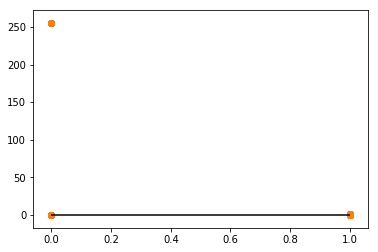

In [39]:
# pull in 2019 dataset
# structure data similar to the above code so that it can be tested
# predictions = classifier.predict(X_test)
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(preds_valid, preds_valid - y_train)
plt.hlines(y=0, xmin=preds_valid.min(), xmax=preds_valid.max())
plt.scatter(preds_train, preds_train - y_train)
plt.show()

In [50]:
import statsmodels.api as sm

logit_model=sm.Logit(y_test,X_test)
result=logit_model.fit()
print(result.summary2())

         Current function value: inf
         Iterations: 35


/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [ ]:
sm.ols

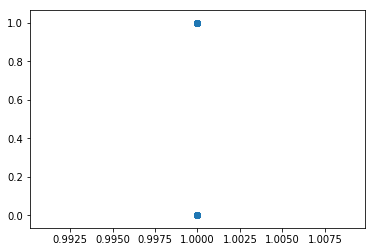

In [47]:
# logistic regression

plt.scatter(preds_test, y_test)
plt.show()